In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_fits import *
from xps.xps_bg import *

In [2]:
jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)

asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

In [32]:
# plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['lines.linewidth'] = 4

# Analysis injections 1000 mbar
400 pulses metOH only, 400 pulses FBI 0.5 mM

At $t_{on}$ = 50 ms and C = 0.5mM

## Read processed experiments

In [372]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200911_Cu_clean3.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200915_Cu_metOH_400pulses.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200916_Cu_FBI_metOH_400pulses.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200917_Cu_FBI_metOH_400pulses_BaCl_subl_30min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200917_Cu_FBI_metOH_400pulses_BaCl_subl_3h.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200917_Cu_FBI_metOH_400pulses_annealing.uxy']

In [373]:
proc_exps = []
colors = ['b', 'purple', 'g', 'r', 'y', 'k', 'magenta', 'c', 'm']
for f in files:
    proc_exps.append(read_processed_xp(f))
    
for xp, c in zip(proc_exps,colors):
    xp.color = c

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200911_Cu_clean3.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200915_Cu_metOH_400pulses.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200916_Cu_FBI_metOH_400pulses.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200917_Cu_FBI_metOH_400pulses_BaCl_subl_30min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_09_11_Cu/proc/20200917_Cu_FBI_metOH_400pulses_BaCl_subl_3h.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_metOH/2020_

## Show individual plots

In [368]:
trim_spectra(proc_exps[0], proc_exps[2], 'Cu_2p', inplace=True)
trim_spectra(proc_exps[1], proc_exps[2], 'Cu_2p', inplace=True);

In [5]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

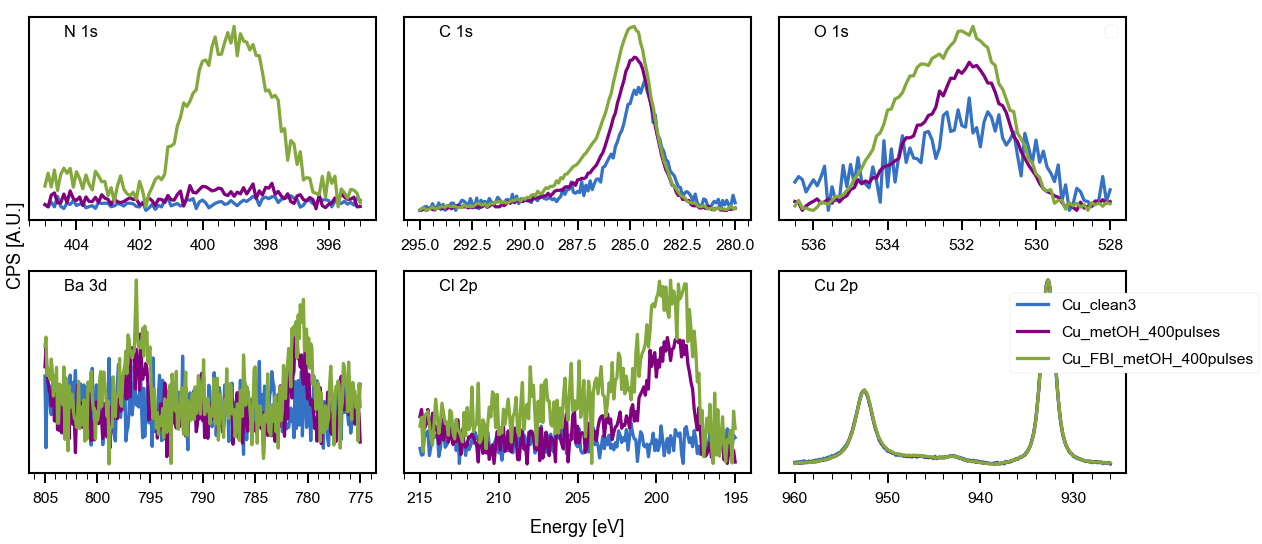

In [369]:
plot_xp_regions(proc_exps[:3], regions, ncols=3);

### Only FBI-Ba

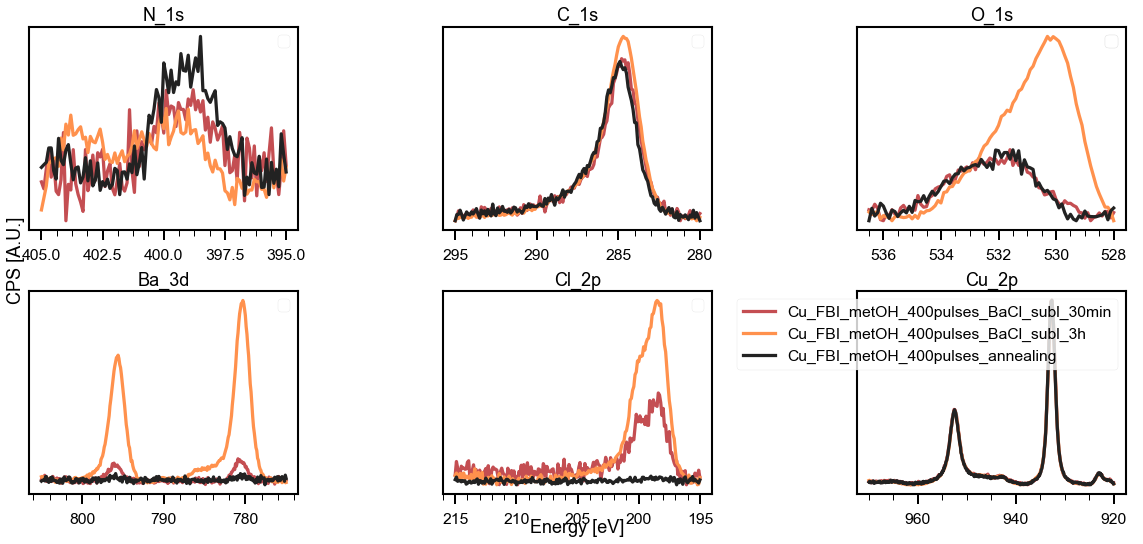

In [10]:
colors = ['r','k', 'c']
plot_xp_regions(proc_exps[3:] , regions, colors, ncols=3);

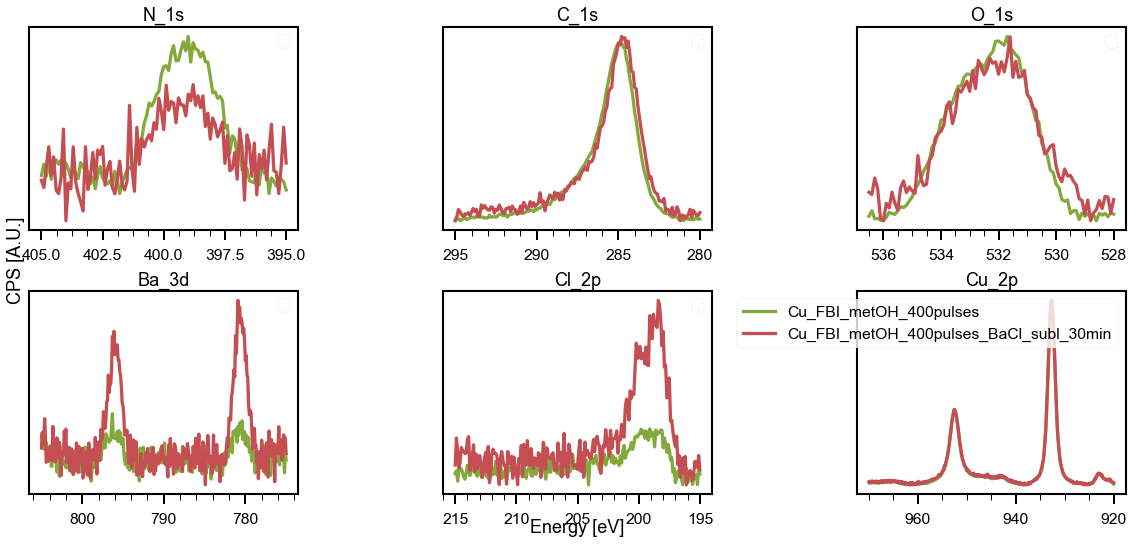

In [11]:
colors = ['r','k', 'c']
plot_xp_regions(proc_exps[2:4] , regions, colors, ncols=3);

## Integrate areas 

In [40]:
regions

['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

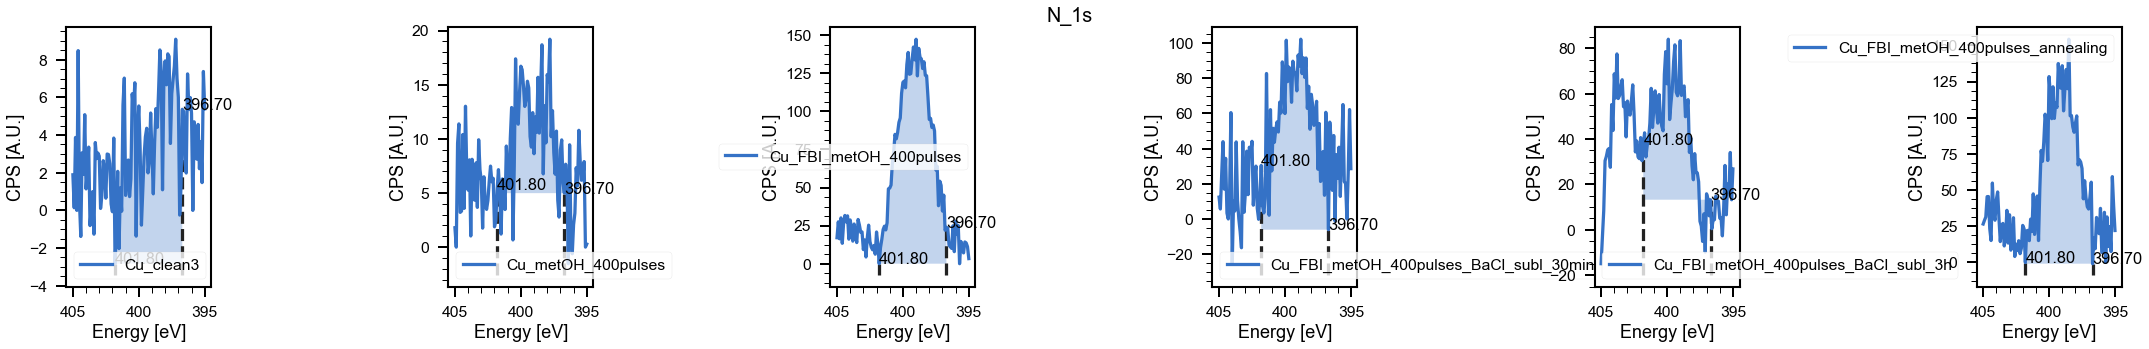

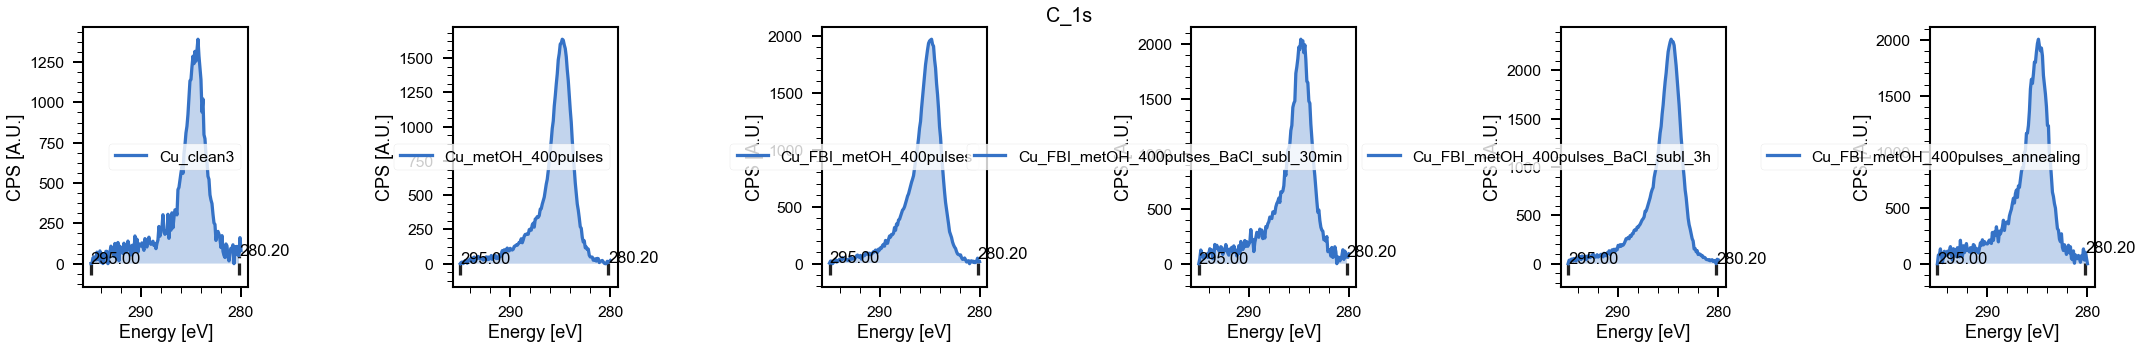

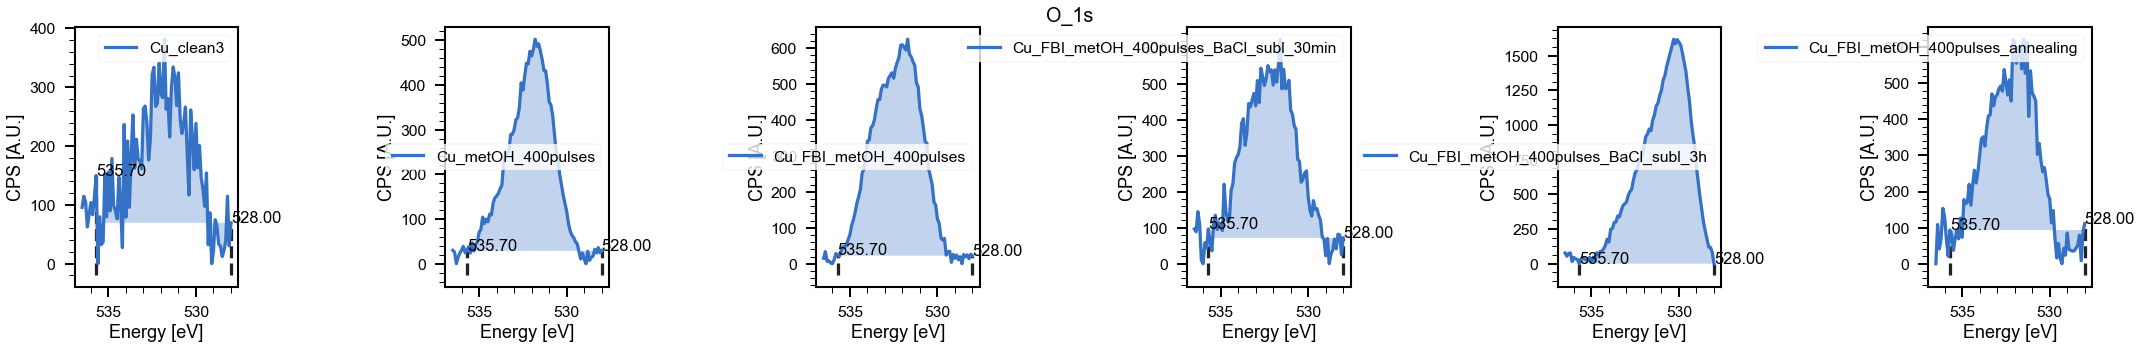

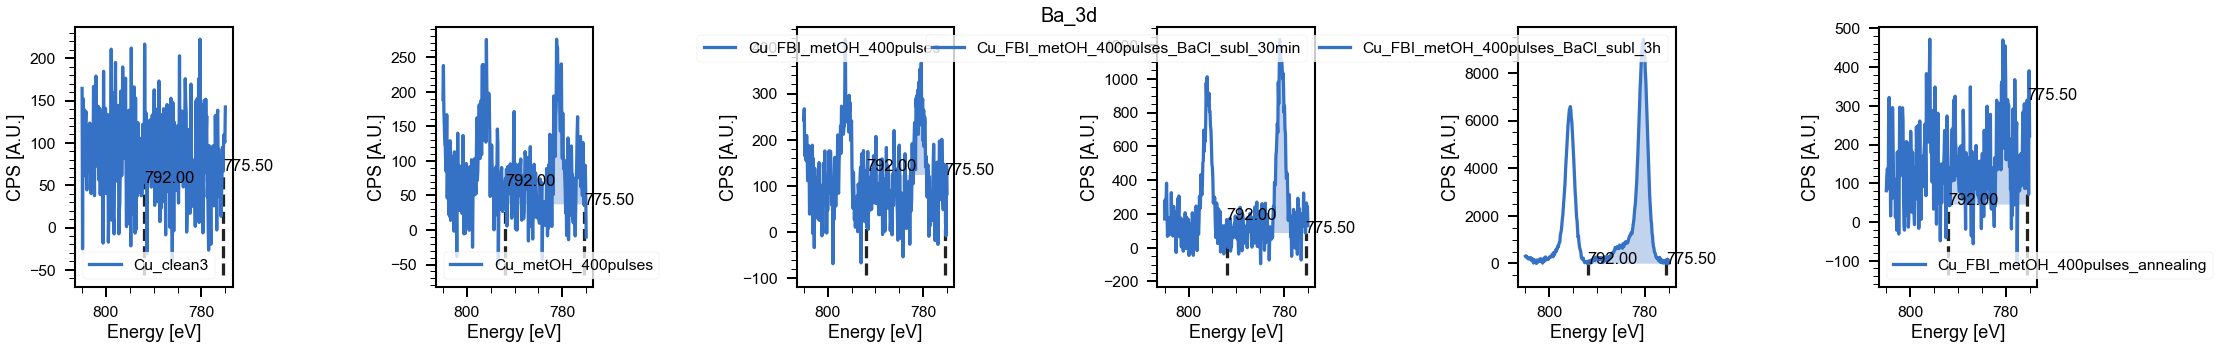

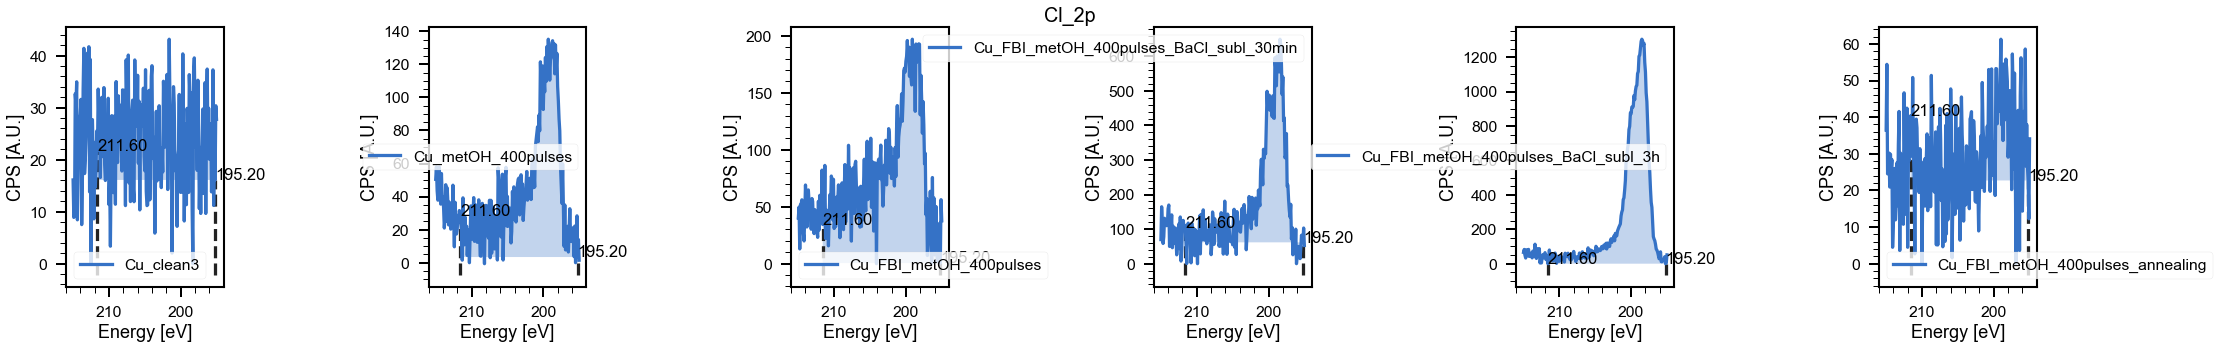

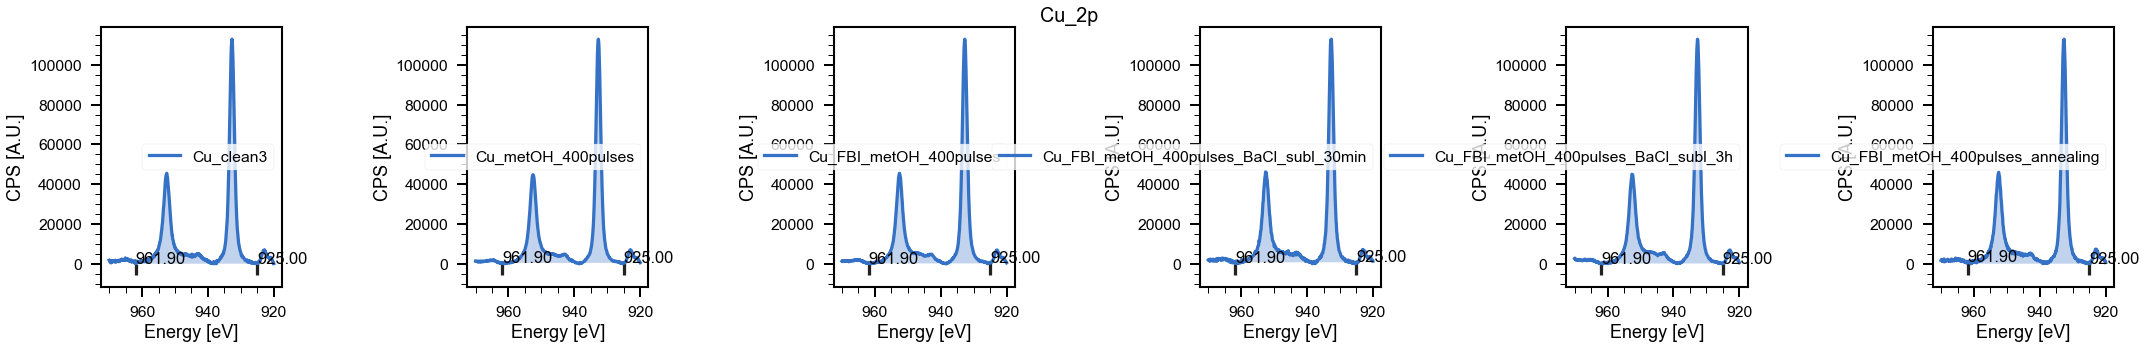

In [12]:
for r in regions:
    integrateRegions(proc_exps, region=r, asf=asf)

## Stoichiometry

In [160]:
area_fbi = {'N_1s' : 3, 'C_1s': 31, 'O_1s': 5, 'Ba_3d': 1e-10, 'Cl_2p': 1e-10}
stofbi = XPS_experiment(name= 'Stoichiometry FBI', area=area_fbi)

area_fbiba = {'N_1s' : 3, 'C_1s': 31, 'O_1s': 13, 'Ba_3d': 1, 'Cl_2p': 2, 'FBI_0' : 1}
stofbiba = XPS_experiment(name= 'Stoichiometry FBI:Ba(ClO4)2', area=area_fbiba)

nf = 0.5
area_4fbiba = {'N_1s' : 3 * nf, 'C_1s': 31 * nf, 'O_1s': 5 * nf + 8, 'Ba_3d': 1, 'Cl_2p': 2, 'FBI_0' : nf}
sto4fbiba = XPS_experiment(name= 'Stoichiometry %.1f FBI: Ba(ClO4)2' %nf, area=area_4fbiba)


area_fbiester = {'N_1s' : 3, 'C_1s': 32, 'O_1s': 7, 'Ba_3d': 1e-10, 'Cl_2p': 2e-10}
stofbiester = XPS_experiment(name= 'Stoichiometry FBI-ester', area=area_fbiester)

area_fbieba = {'N_1s' : 3, 'C_1s': 32, 'O_1s': 7 + 8, 'Ba_3d': 1, 'Cl_2p': 2}
stofbieba = XPS_experiment(name= 'Stoichiometry FBI-ester : Ba(ClO4)2', area=area_fbieba)

### FBI only

In [16]:
fexps = [proc_exps[i] for i in [2, 5]]
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))

display_stoichiometry(fexps + [stofbi], num, denom)

In [412]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Cl_2p', 'Ba_3d'), ('O_1s', 'N_1s', 'O_1s', 'O_1s', 'O_1s'))

display_stoichiometry(fexps , num, denom)

### FBI-Ba

In [162]:
fbexps = [proc_exps[i] for i in [3, 4]] 
for xp in fbexps:
    xp.area['FBI_0'] = xp.area['N_1s'] / 3

num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Ba_3d', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'FBI_0', 'N_1s', 'Cl_2p', 'Ba_3d'))
display_stoichiometry(fbexps + [stofbiba, sto4fbiba], num, denom)

In [31]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
Cu_clean	0.35	 45.98	 16.06	 0.10	 174.96	 
FBI_100_pulses	0.50	 28.77	 14.25	 0.06	 59.82	 
FBI_Ba_100_pulses	1.38	 10.19	 14.07	 0.01	 13.95	 
FBI_200_pulses	0.72	 12.36	 8.92	 0.02	 37.70	 
FBI_Ba_200_pulses	0.26	 9.64	 2.51	 0.07	 21.94	 
FBI_400_pulses	0.71	 10.18	 7.26	 0.02	 16.14	 
FBI-ester_200_pulses	1.13	 2.30	 2.61	 0.00	 4.68	 
FBI-ester_200_pulses_Ba_subl	0.92	 3.58	 3.29	 0.17	 8.38	 


### FBI: N·metOH

In [28]:
nmoh = 4

area_fmoh = {'N_1s' : 3 , 'C_1s': 31 + 3*nmoh, 'O_1s': 5 + nmoh}
stofmoh = XPS_experiment(name= 'Stoichiometry FBI (%.1f metOH)' %nmoh, area=area_fmoh)


fexps = [proc_exps[i] for i in [1, 2, 5]]
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))

display_stoichiometry(fexps + [stofbi, stofmoh], num, denom)

## Thickness

In [364]:
fexps[1].name

'Cu_FBI_metOH_400pulses'

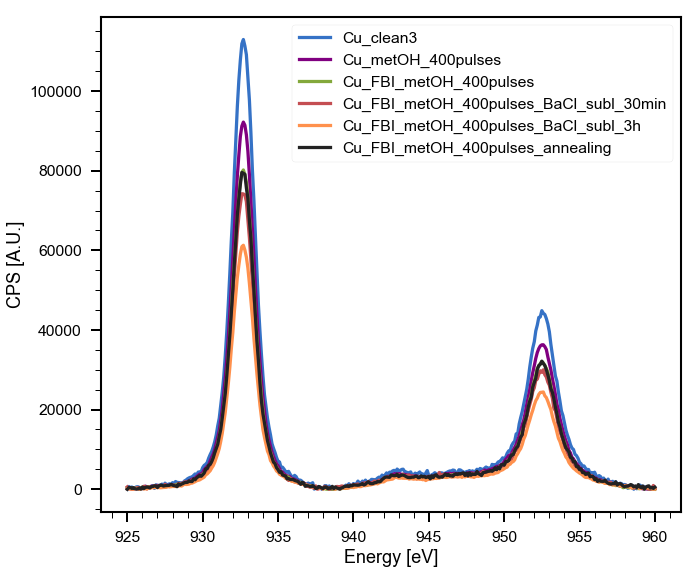

In [374]:
for xp in proc_exps:
    plot_region(xp, 'Cu_2p')

In [413]:
1486.6 - 932

554.5999999999999

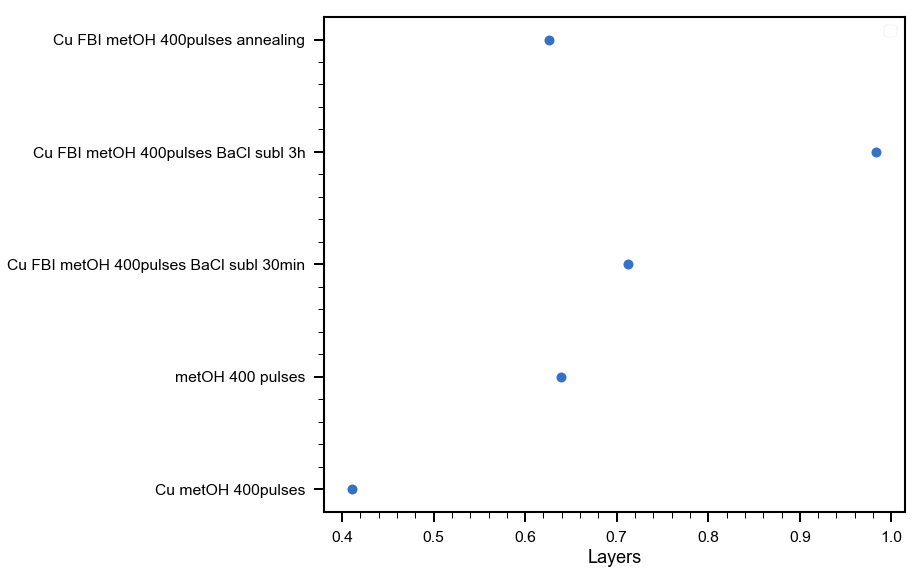

In [414]:
inds = [[1, 2, 3, 4, 5, 0]]
arrange_coverages(proc_exps, inds, r_ml=1.1, region='Cu_2p', mfp=1.84, takeoff=10)
plot_coverages(proc_exps)

In [379]:
proc_exps[2].area['layers']

0.8973192730304862

### Molecular density

In [378]:
for xp in proc_exps[1:]:
    print(xp.name, ': %.1e ± %.1e molec/mm2' %fbi_n_density((xp.area['layers']*1.1*nm, xp.area['dlayers']*1.1*nm)) )

Cu_metOH_400pulses : 1.5e+06 ± 3.5e+03 molec/mm2
Cu_FBI_metOH_400pulses : 2.3e+06 ± 5.6e+03 molec/mm2
Cu_FBI_metOH_400pulses_BaCl_subl_30min : 2.6e+06 ± 6.3e+03 molec/mm2
Cu_FBI_metOH_400pulses_BaCl_subl_3h : 3.8e+06 ± 1.7e+04 molec/mm2
Cu_FBI_metOH_400pulses_annealing : 2.3e+06 ± 5.5e+03 molec/mm2


# Compare to sublimation

In [381]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new

subl_exps = []
for f in files:
    subl_exps.append(read_processed_xp(f))

[xp.name for xp in subl_exps]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_05_Cu/proc/20210205_14-Cu_FBI_subl_8min_BaCl2_1min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_05_Cu/proc/20210205_14-Cu_clean2.uxy.ft', returning empty fit dict


['11-Cu_FBI_subl_20min',
 '11-Cu_FBI_subl_20min_BaCl2_2min',
 '11-Cu_clean',
 '12-Cu_FBI_subl_20min',
 '12-Cu_FBI_subl_20min_BaCl2_4min',
 '12-Cu_clean',
 '13-Cu_FBI_subl_60min',
 '13-Cu_FBI_subl_60min_BaCl2_4min',
 '13-Cu_FBI_subl_60min_BaCl2_8min',
 '13-Cu_FBI_subl_60min_BaCl2_12min',
 '13-Cu_clean',
 '14-FBI 8min',
 '14-FBI 8min, BaCl$_2$ 1min',
 '14-Cu_clean2']

In [406]:
[xp.name for xp in subl_exps]
# sublf = [subl_exps[i] for i in [0, 3, 6, 11]]
sublf = [subl_exps[i] for i in [11, 3, 6]]

sublfb = [subl_exps[i] for i in [1, 4, 7, 8, 9, 10, 11]]
sublf[1].color = 'b'

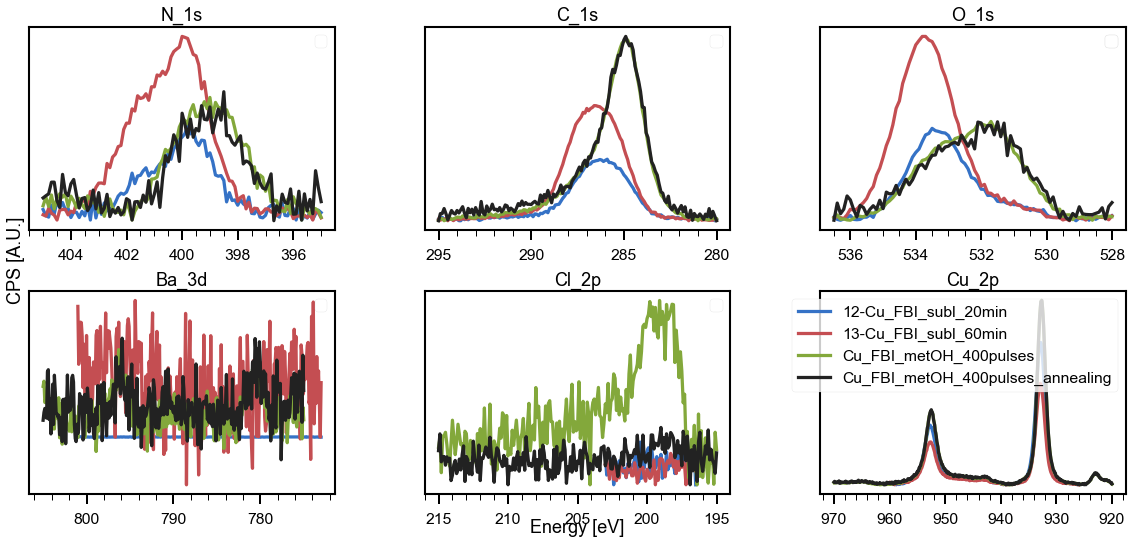

In [70]:
plot_xp_regions(sublf[1:3] + fexps[1:3], regions);

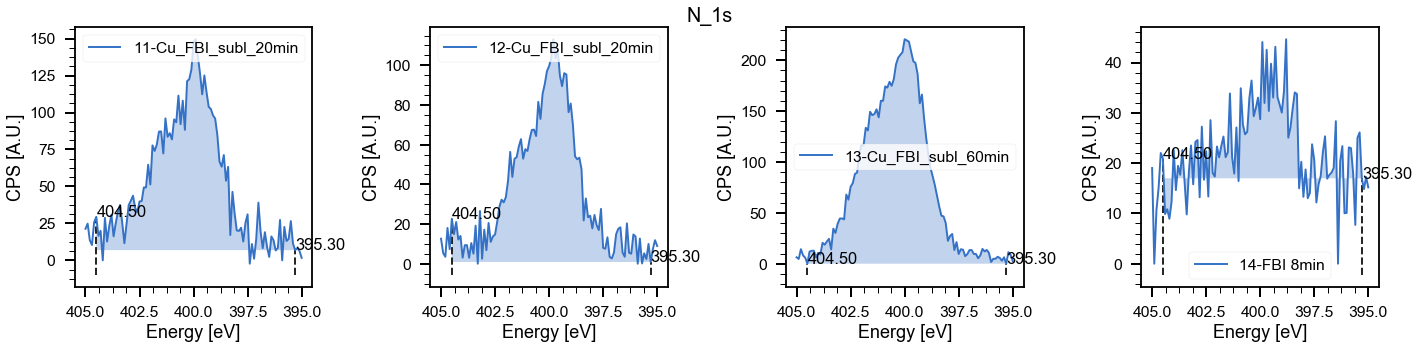

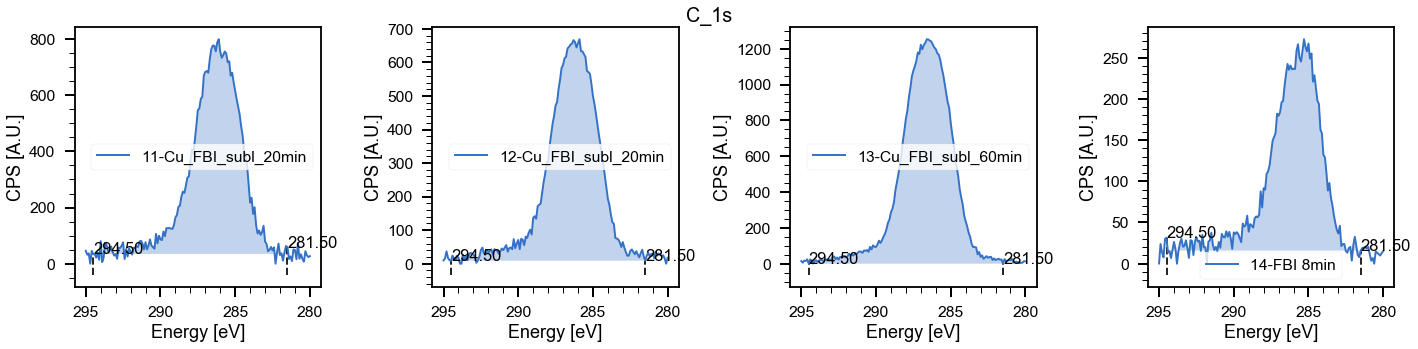

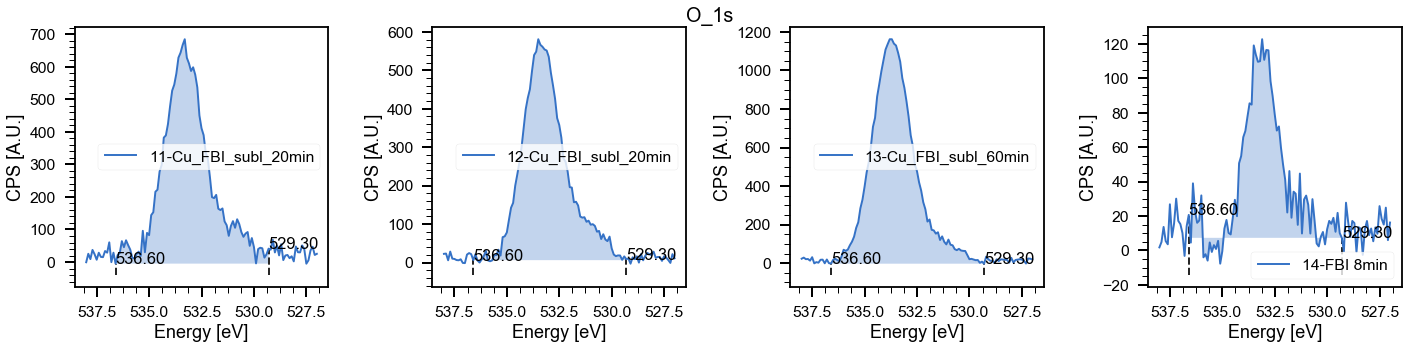

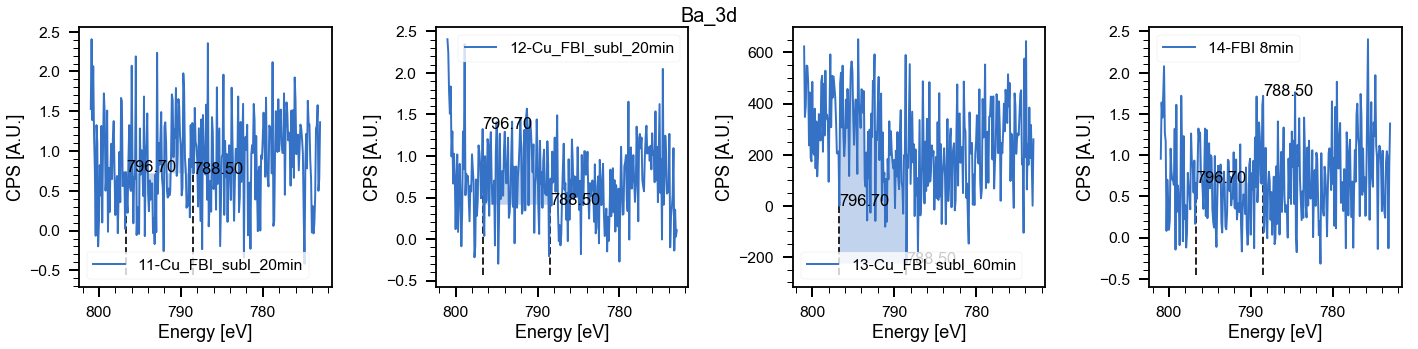

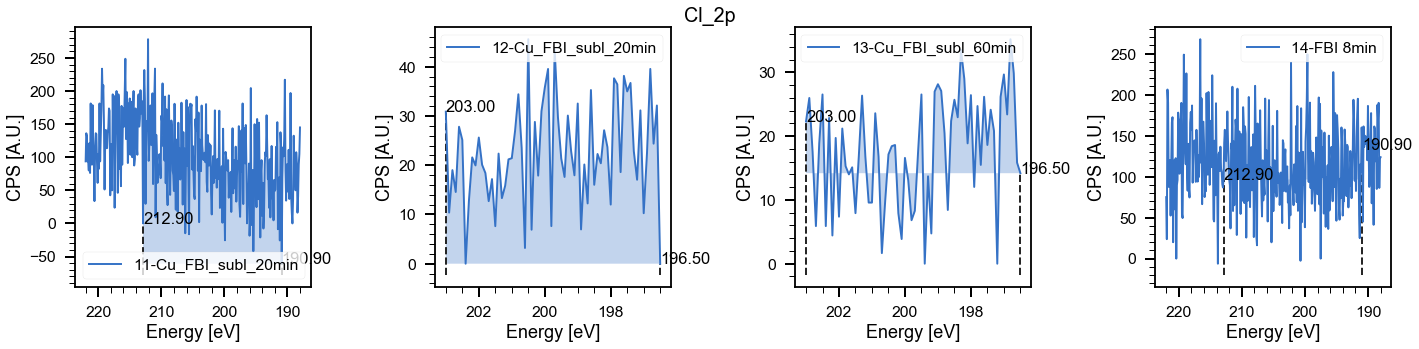

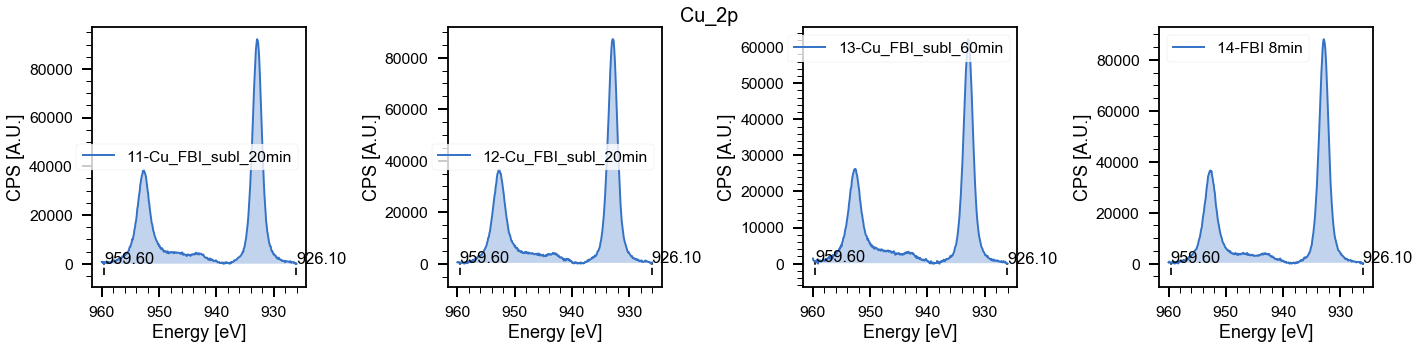

In [122]:
for r in regions:
    integrateRegions(sublf, region=r, asf=asf)

In [123]:
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))
display_stoichiometry(sublf + [stofbi], num, denom)

In [289]:
for xp in sublfb:
    xp.area['FBI_0'] = xp.area['N_1s'] / 3

num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Ba_3d', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'FBI_0', 'N_1s', 'Cl_2p', 'Ba_3d'))
# num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))
display_stoichiometry( sublfb[:3] +  [stofbiba], num, denom)

In [162]:
for xp in sublfb:
    xp.area['FBI_0'] = xp.area['N_1s'] / 3

num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Ba_3d', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'FBI_0', 'N_1s', 'Cl_2p', 'Ba_3d'))
display_stoichiometry(fbexps + [stofbiba, sto4fbiba], num, denom)

# Compare to AcN deposition

In [415]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new

acn_exps = []
colors = ['b', 'g', 'r', 'y', 'purple', 'y', 'magenta', 'c', 'm']
for f in files:
    acn_exps.append(read_processed_xp(f))
    
for xp, c in zip(acn_exps,colors):
    xp.color = c

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/18062020_Cu_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/19062020_Cu_FBI_100pulses_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200628_Cu_FBI_100pulses_1e-4M_BaClO42_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200702_Cu_FBI_200pulses_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200706_Cu_FBI_200pulses_1e-4M_BaClO42_1e-4M_200pulses.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200716_Cu_FBI_400pulses_1e-4M.uxy.ft', returning empty fit dict
[Err

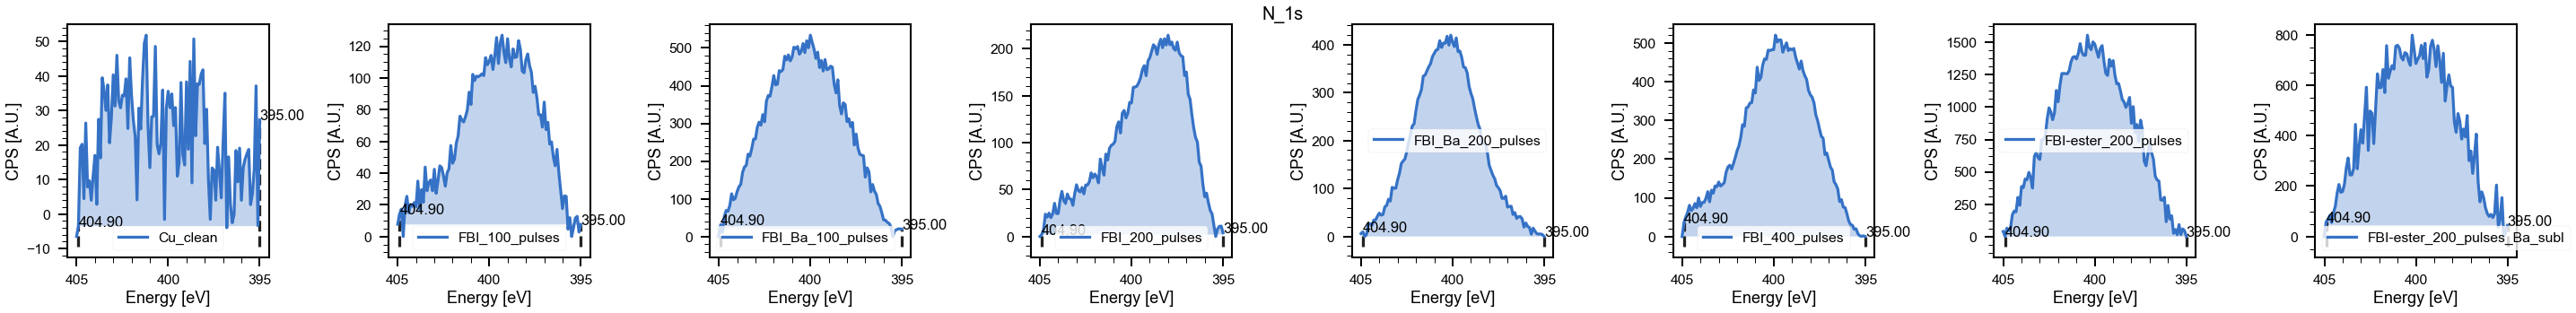

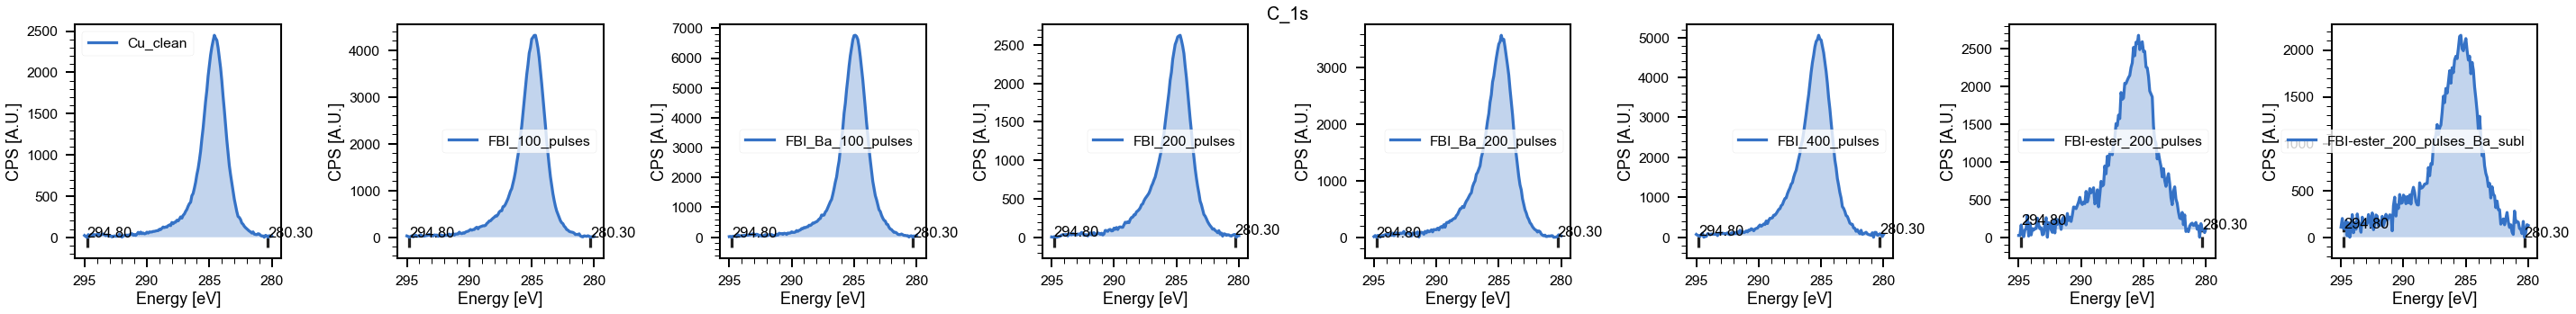

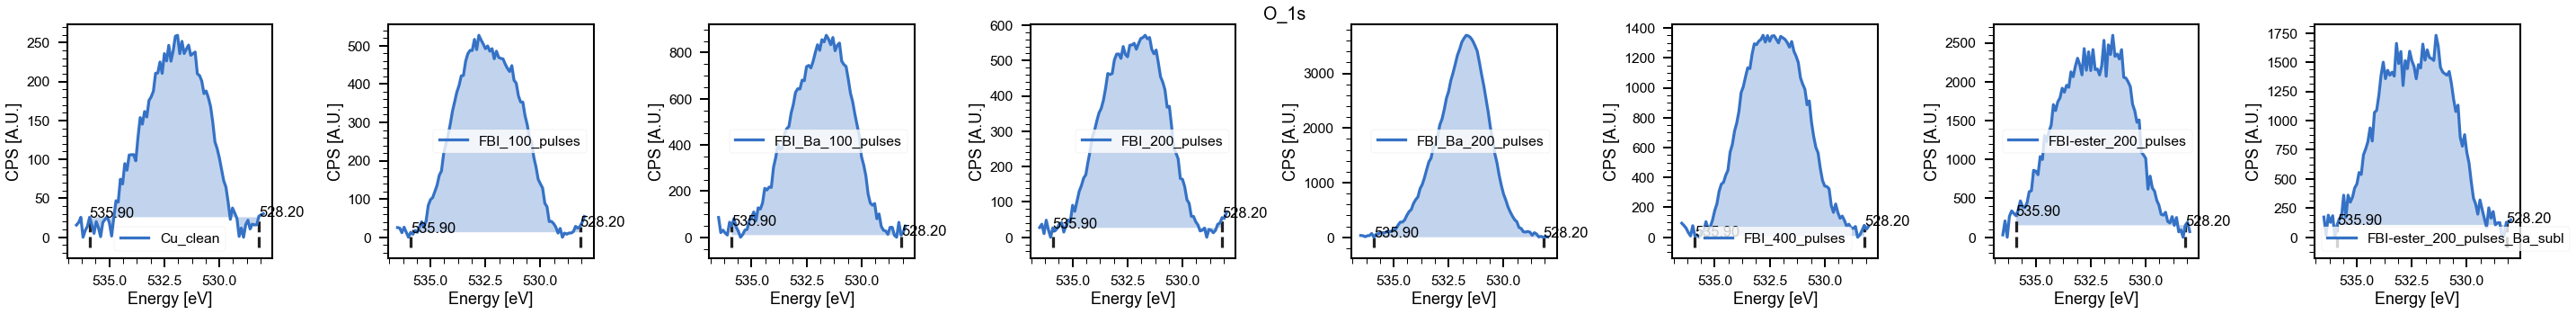

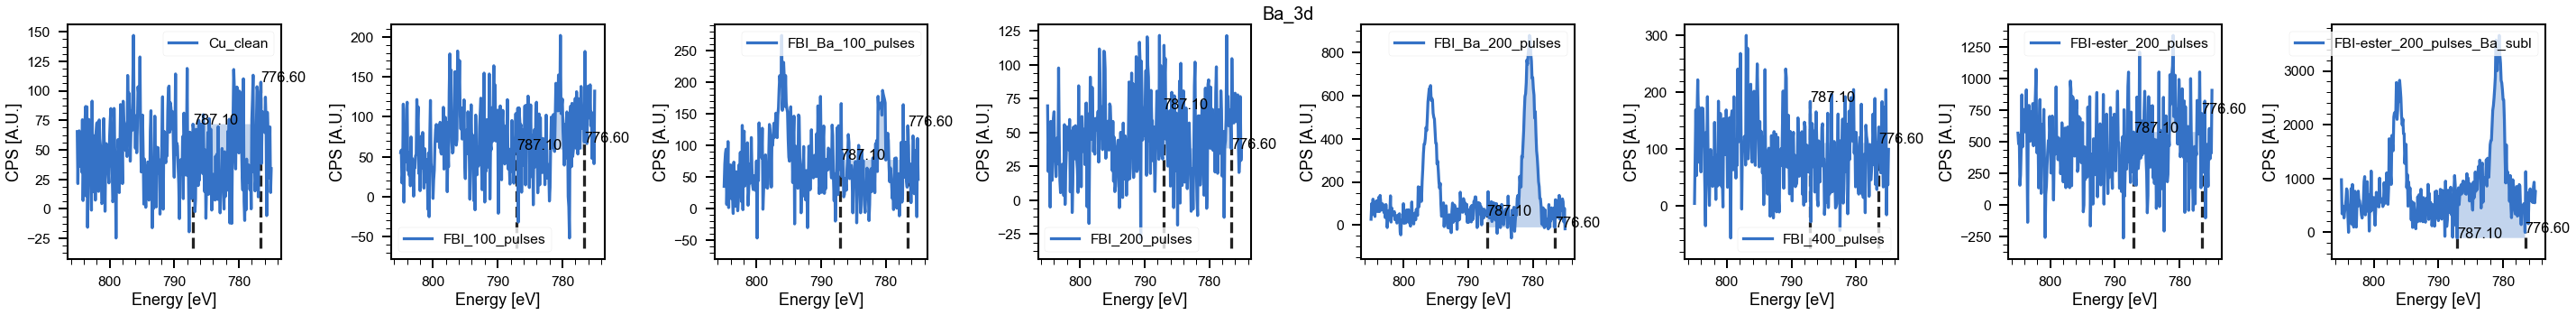

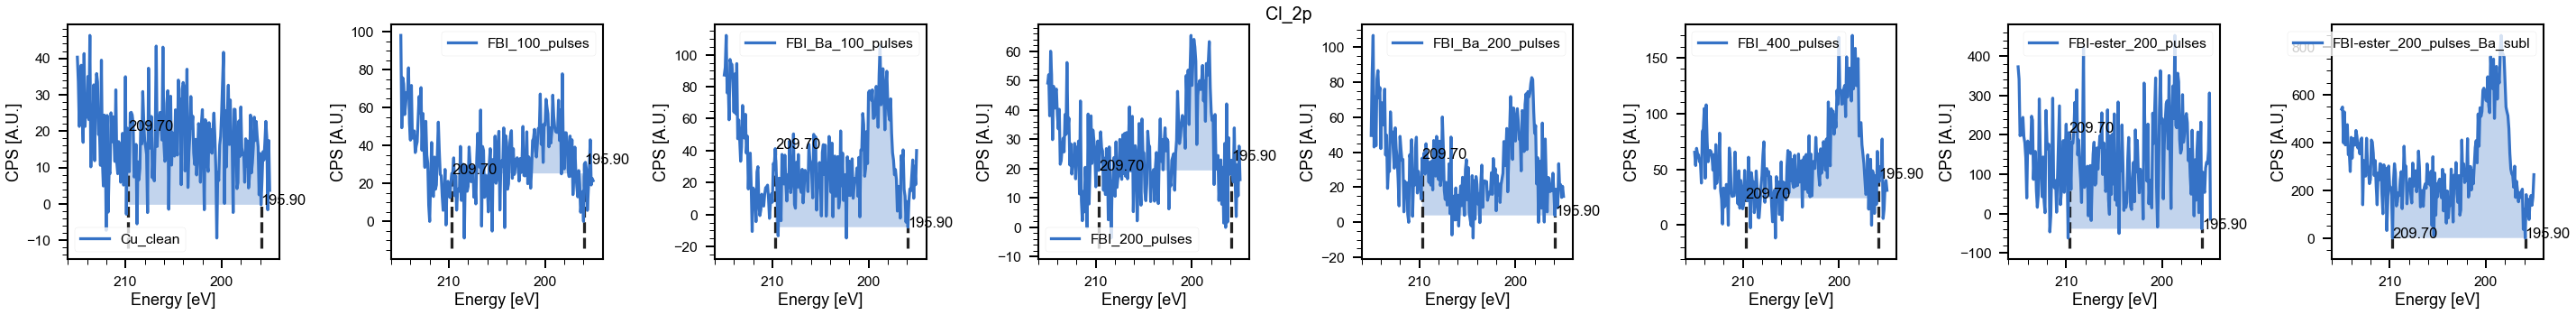

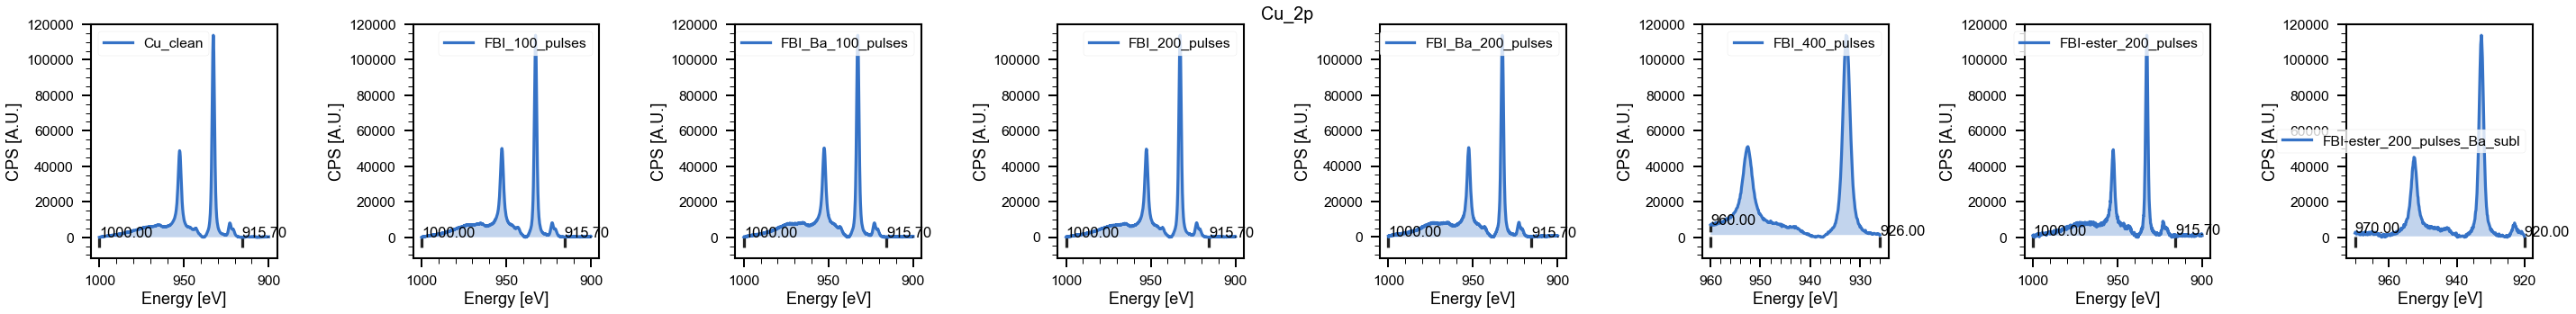

In [94]:
for r in regions:
    integrateRegions(acn_exps, r, asf=asf)

'Ba_3d' region does not exist in 11-Cu_clean
'Ba_3d' region does not exist in 12-Cu_clean
'Cl_2p' region does not exist in 11-Cu_clean
'Cl_2p' region does not exist in 13-Cu_clean
'Cl_2p' region does not exist in 14-Cu_clean2


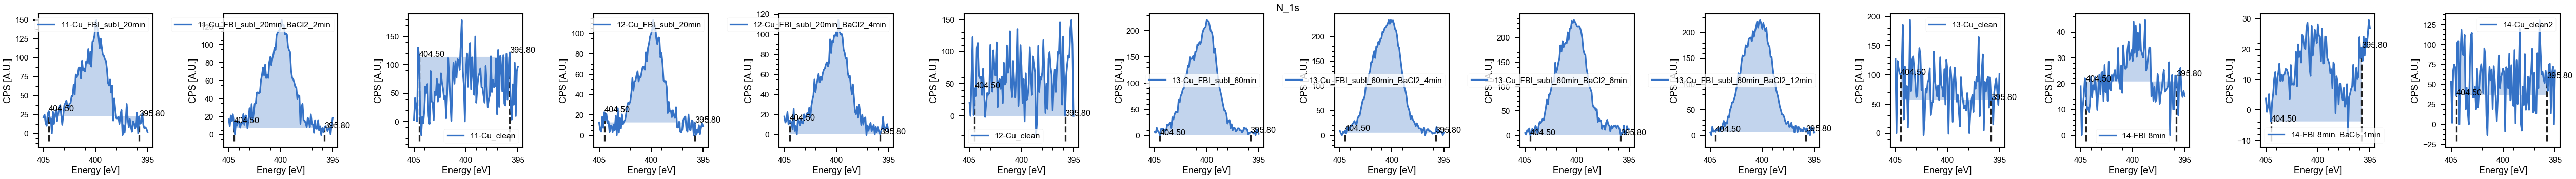

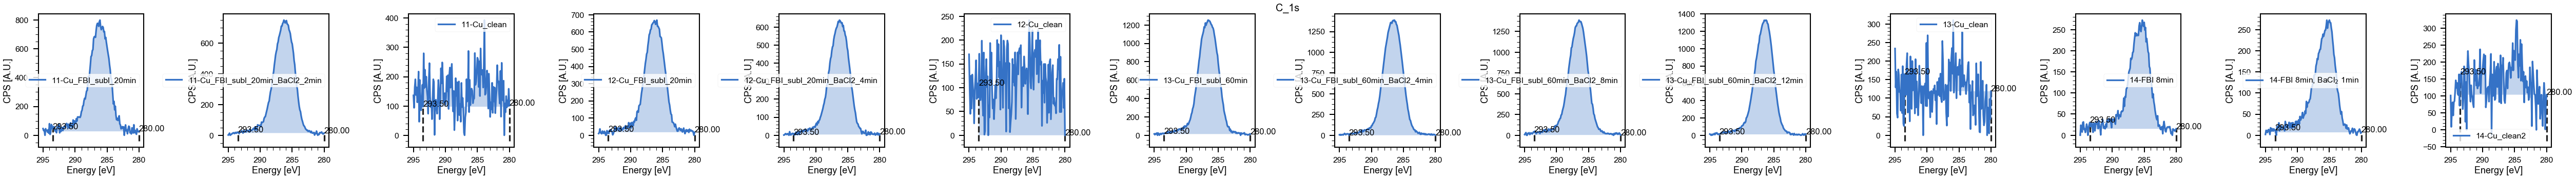

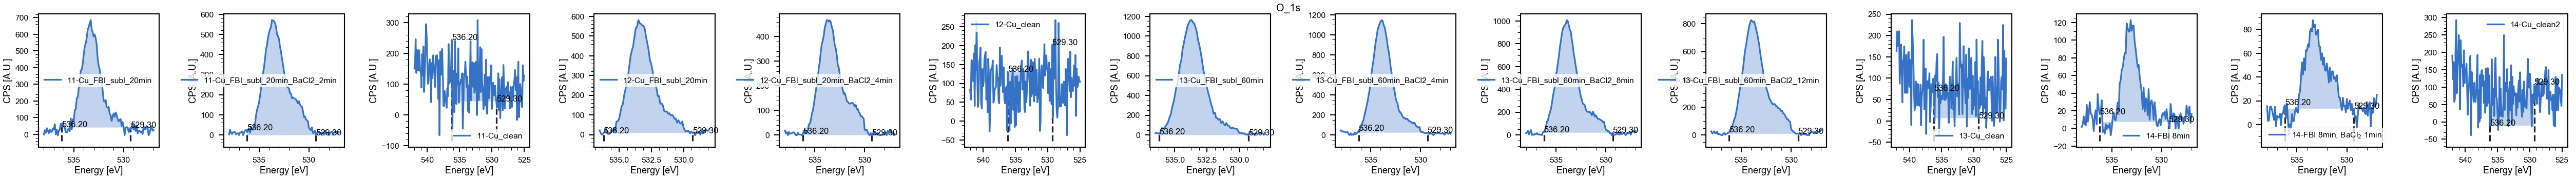

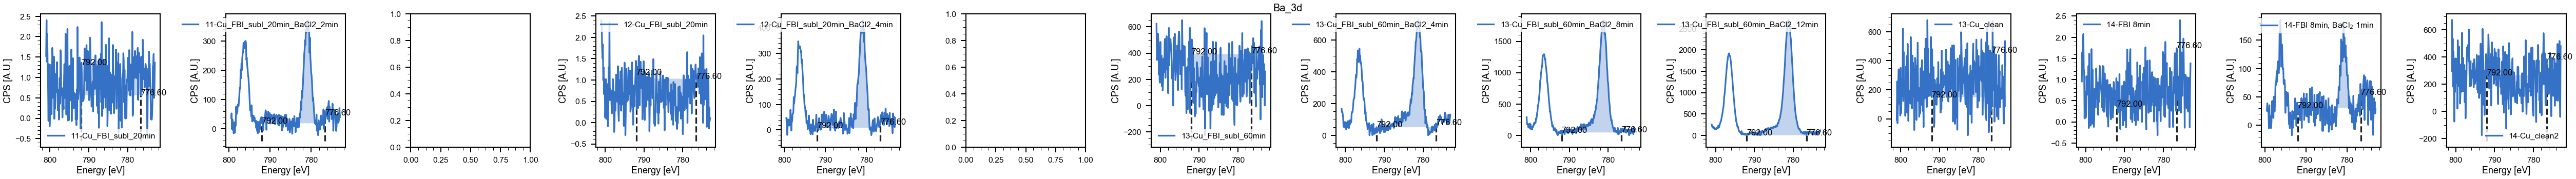

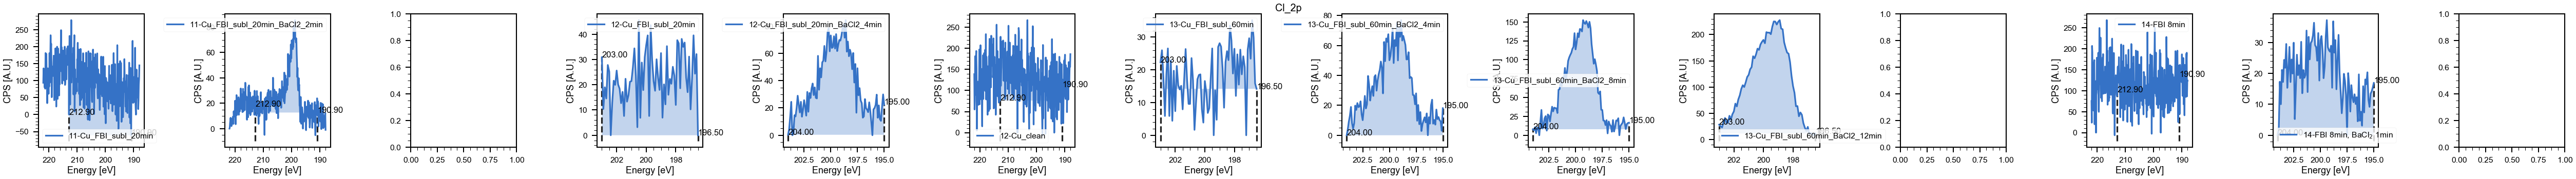

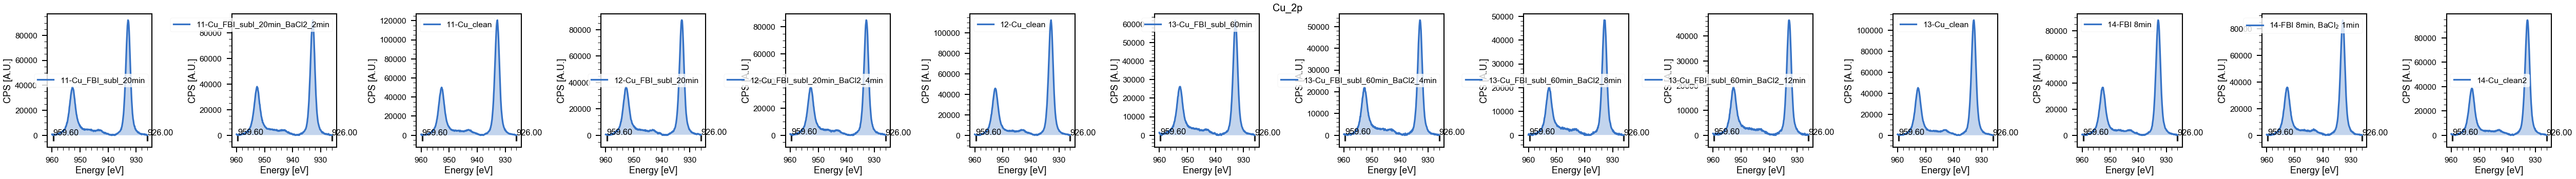

In [104]:
for r in regions:
    integrateRegions(subl_exps, r, asf=asf)

In [51]:
trim_spectra(acn_exps[5], fexps[2], 'Cu_2p', inplace=True);

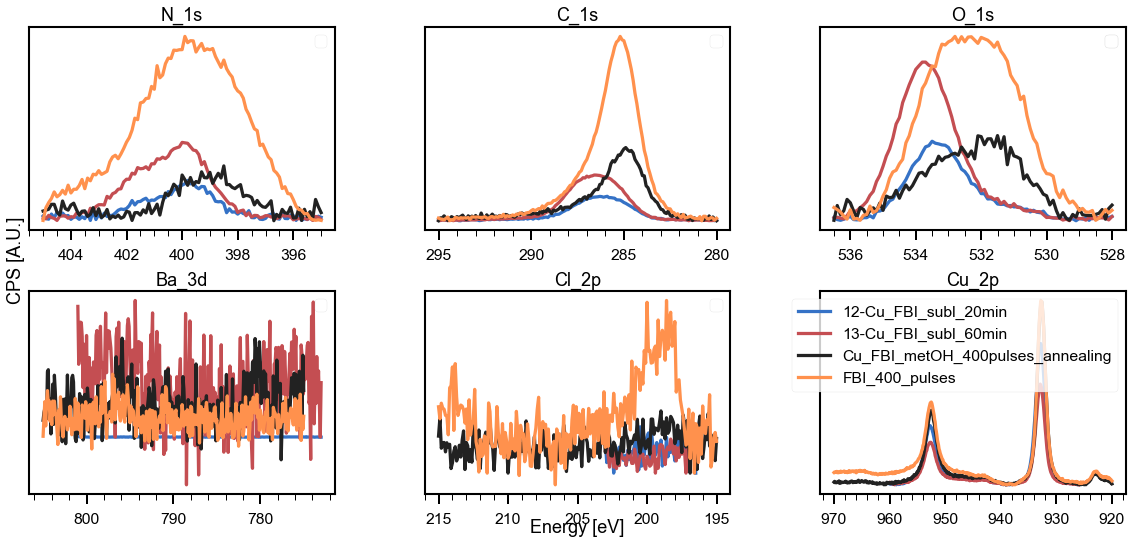

In [71]:
plot_xp_regions(sublf[1:3] + [fexps[2]] + [acn_exps[5]], regions);

In [358]:
sublf[2].area['layers']

0.899023390302803

## Normal FBI regions

In [96]:
trim_spectra(sublf[1], fexps[2], 'O_1s', inplace=True);
trim_spectra(sublf[2], fexps[2], 'O_1s', inplace=True);

In [97]:
trim_spectra(acn_exps[5], sublf[2], 'Cu_2p', inplace=True);
trim_spectra(fexps[1], sublf[2], 'Cu_2p', inplace=True);

In [319]:
sel = sublf[1:3] + [fexps[1], acn_exps[5]]
nsel = [normalise_dfx(xp) for xp in sel]

names = ['Sublimation subML', 'Sublimation ML', 'ALI 400 pulses, metOH', 'ALI 400 pulses, AcN']
cols = ['g', 'k', 'r', 'b']
for xp, n, c in zip(nsel, names, cols):
    xp.name = n
    xp.color = c

In [320]:
for xp in nsel[1:]:
    shift = find_shift(xp, nsel[0], 'Cu_2p')
    align_dfx(xp, shift, inplace=True);

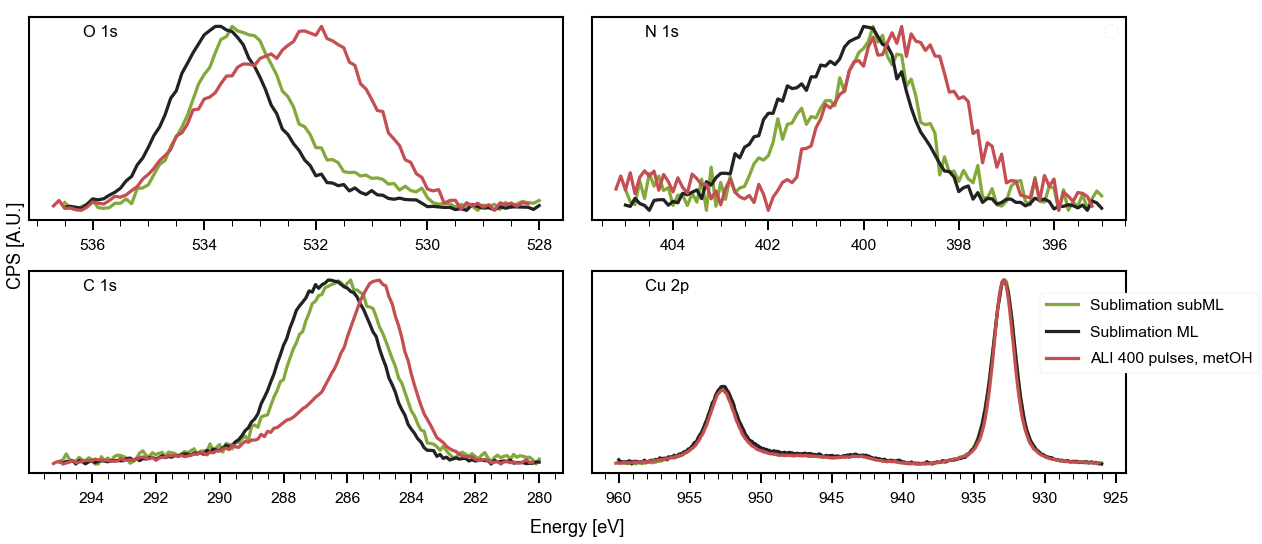

In [321]:
plot_xp_regions(nsel[:3], ['O_1s', 'N_1s', 'C_1s', 'Cu_2p'], ncols=2);

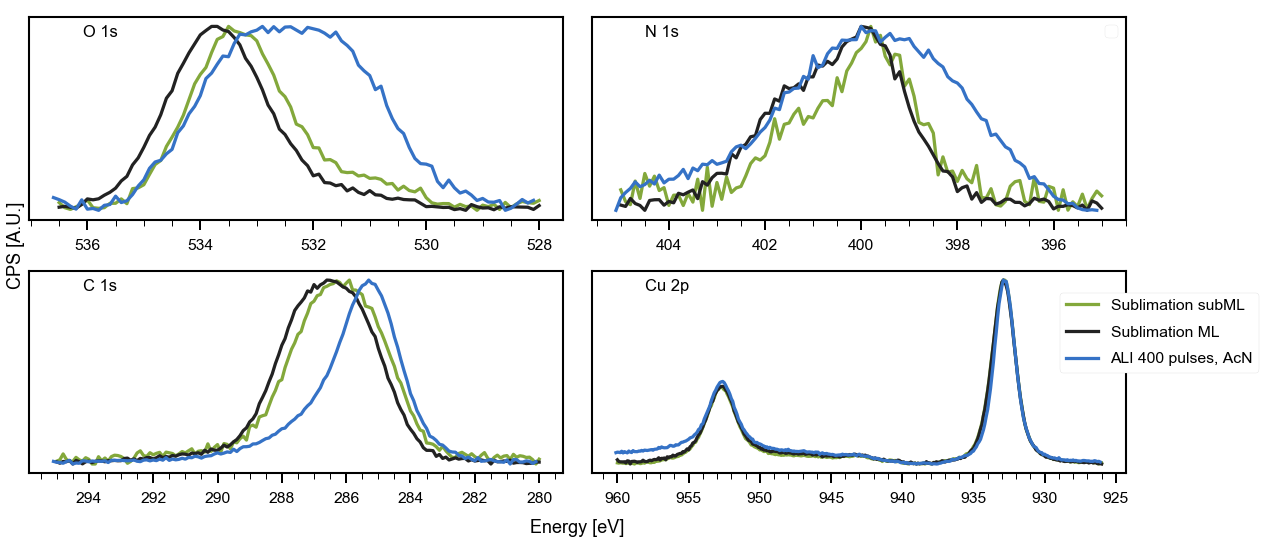

In [322]:
plot_xp_regions(nsel[:2]+[nsel[-1]], ['O_1s', 'N_1s', 'C_1s', 'Cu_2p'], ncols=2);

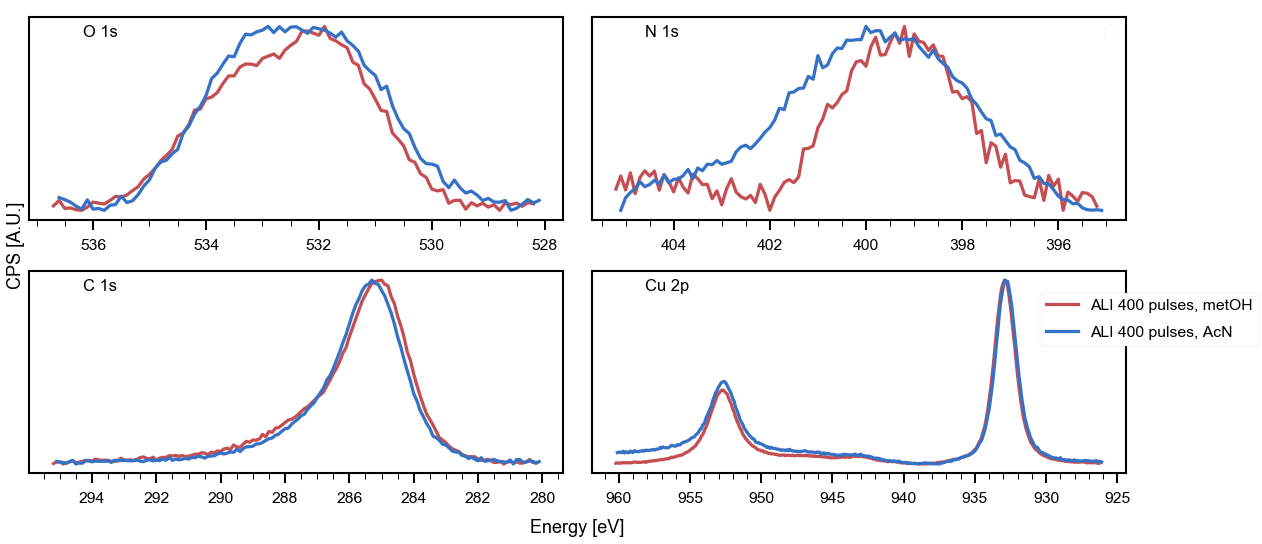

In [323]:
plot_xp_regions(nsel[2:], ['O_1s', 'N_1s', 'C_1s', 'Cu_2p'], ncols=2);

In [115]:
num, denom = (('O_1s', 'C_1s', 'C_1s'), ('N_1s', 'N_1s', 'O_1s'))
make_stoichometry_table(nsel + [stofbi],  num=num, denom=denom)

Experiment	O_/N_	C_/N_	C_/O_	
Sublimation subML	2.79 	 12.85 	 4.61 	 
Sublimation ML	2.57 	 10.89 	 4.24 	 
ALI 400 pulses, metOH	3.22 	 23.42 	 7.28 	 
ALI 400 pulses, AcN	1.40 	 10.06 	 7.20 	 
Stoichiometry FBI	1.67 	 10.33 	 6.20 	 


In [111]:
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))
display_stoichiometry(nsel+ [stofbi],  num=num, denom=denom)

## Normal FBI-Ba regions

In [134]:
trim_spectra(sublfb[0], fbexps[0], 'O_1s', inplace=True);
trim_spectra(sublfb[1], fbexps[0], 'O_1s', inplace=True);

In [174]:
trim_spectra(acn_exps[4], sublf[2], 'Cu_2p', inplace=True);
trim_spectra(acn_exps[3], sublf[2], 'Cu_2p', inplace=True);

trim_spectra(fbexps[0], sublf[2], 'Cu_2p', inplace=True);

In [118]:
[xp.name for xp in sublfb]

['11-Cu_FBI_subl_20min_BaCl2_2min',
 '12-Cu_FBI_subl_20min_BaCl2_4min',
 '13-Cu_FBI_subl_60min_BaCl2_4min',
 '13-Cu_FBI_subl_60min_BaCl2_8min',
 '13-Cu_FBI_subl_60min_BaCl2_12min',
 '13-Cu_clean',
 '14-FBI 8min']

In [121]:
[xp.name for xp in acn_exps]

['Cu_clean',
 'FBI_100_pulses',
 'FBI_Ba_100_pulses',
 'FBI_200_pulses',
 'FBI_Ba_200_pulses',
 'FBI_400_pulses',
 'FBI-ester_200_pulses',
 'FBI-ester_200_pulses_Ba_subl']

In [328]:
sel = sublf[1:3] + [fexps[1], acn_exps[3]]
nsel = [normalise_dfx(xp) for xp in sel]

names = ['Sublimation subML', 'Sublimation ML', 'ALI 400 pulses, metOH', 'ALI 200 pulses, AcN']
for xp, n in zip(nsel, names):
    xp.name = n

In [345]:
selba = sublfb[:2] + [fbexps[0], acn_exps[4]]
nselba = [normalise_dfx(xp) for xp in selba]

names = ['Sublimation subML \n $\Phi_{Ba}$ = 0.5', 'Sublimation subML \n$\Phi_{Ba}$ = 0.6', 'ALI 400 pulses, metOH, \n$\Phi_{Ba}$ = 2.4', 'ALI 200 pulses, AcN, \n$\Phi_{Ba} = 0.2$']
for xp, n in zip(nselba, names):
    xp.name = n

nsel[0].color = 'g'
nsel[2].color = 'r'
nsel[3].color = 'b'

nselba[0].color = 'y' 
nselba[1].color = 'k'
nselba[2].color = 'c'

In [336]:
for xp in nselba[1:]:
    shift = find_shift(xp, nsel[0], 'Cu_2p')
    align_dfx(xp, shift, inplace=True);

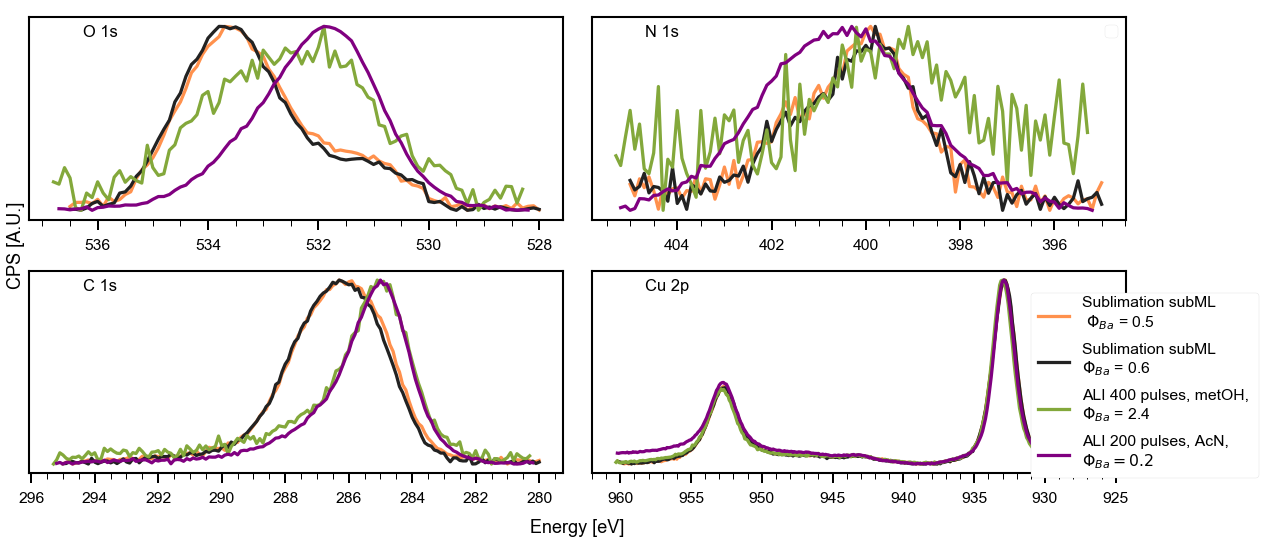

In [337]:
plot_xp_regions(nselba, ['O_1s', 'N_1s', 'C_1s', 'Cu_2p'], ncols=2);

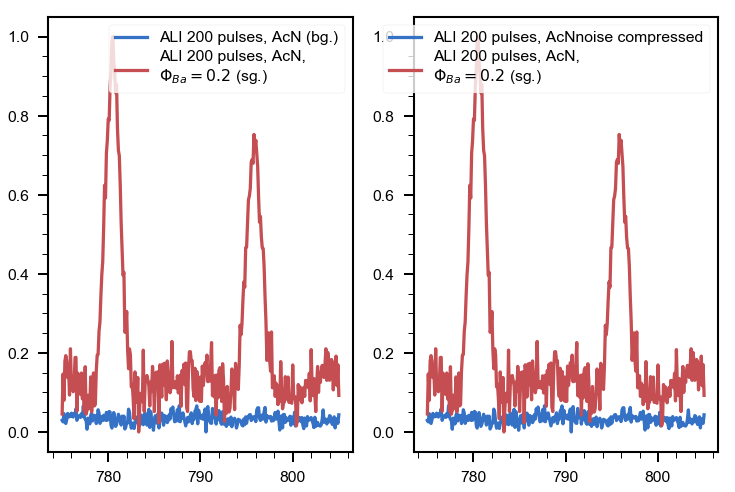

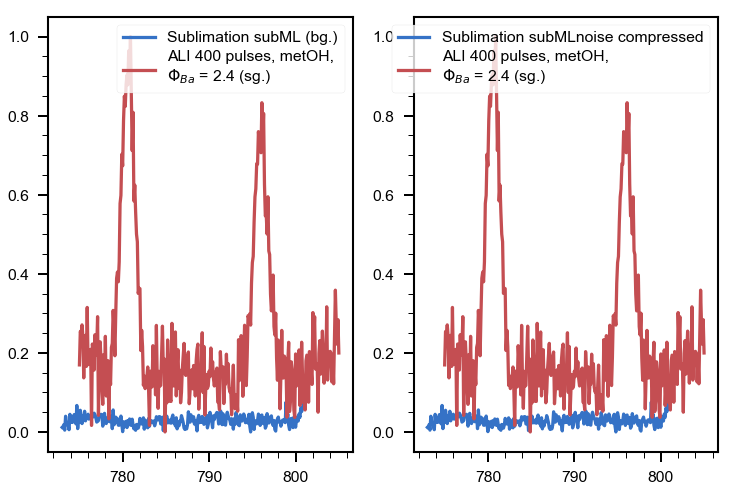

In [346]:
compress_noisy_region(nsel[3], nselba[3], 'Ba_3d', inplace=True);
compress_noisy_region(nsel[0], nselba[2], 'Ba_3d', inplace=True);

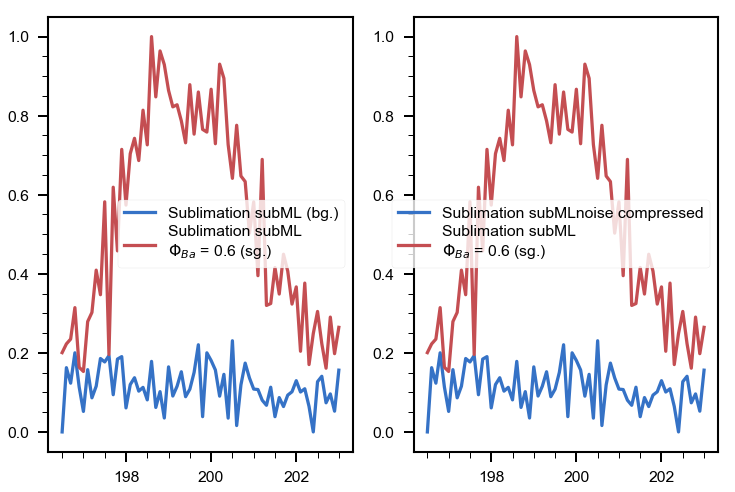

In [347]:
for xp in nsel[1:]:
    trim_spectra(xp, nsel[1], 'Cl_2p', inplace=True);
for xp in nselba[0:]:
    trim_spectra(xp, nsel[1], 'Cl_2p', inplace=True);
compress_noisy_region(nsel[0], nselba[1], 'Cl_2p', inplace=True);

In [348]:
def plot_xp_regions(experiments : list, regions : list, colors : list = [], ncols: int = 3, flag_shift: bool = False):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    fig.add_subplot(111, frameon=False, xticks=[], yticks=[])  # Used for common xlabel and ylabel

    for i,r in enumerate(regions):
        enmx, comx = [], [] # Peak point lists
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols

            if i == len(regions) - 1:   # Set labels from last region
                lb = xp.name

            else:
                lb='__nolabel__'

            try:
                li = plot_region(xp, r, ax=ax[j][k], lb=lb)
                ax[j][k].invert_xaxis()
            except KeyError:    # Auto-exclude regions not recorded for a particular experiment
                pass
            if flag_shift:
                argmx = np.argmax(xp.dfx[r].counts)
                enmx.append(xp.dfx[r].energy.loc[argmx])
                comx.append(xp.dfx[r].counts.loc[argmx])

        ax[j][k].text(s=r.replace('_', ' '), y=0.9, x=0.1, transform=ax[j][k].transAxes)
        ax[j][k].set_yticks([])
        if flag_shift:  ax[j][k].plot(enmx, comx, '--k', lw=2.5)

        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    ax[j][k].legend().remove()

    plt.xlabel('\n\nEnergy [eV]', ha='center')
    plt.figlegend(  ncol=1, bbox_to_anchor=(1.1, 0.45), framealpha=1. , labelspacing=0.8)
    plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)

    return ax

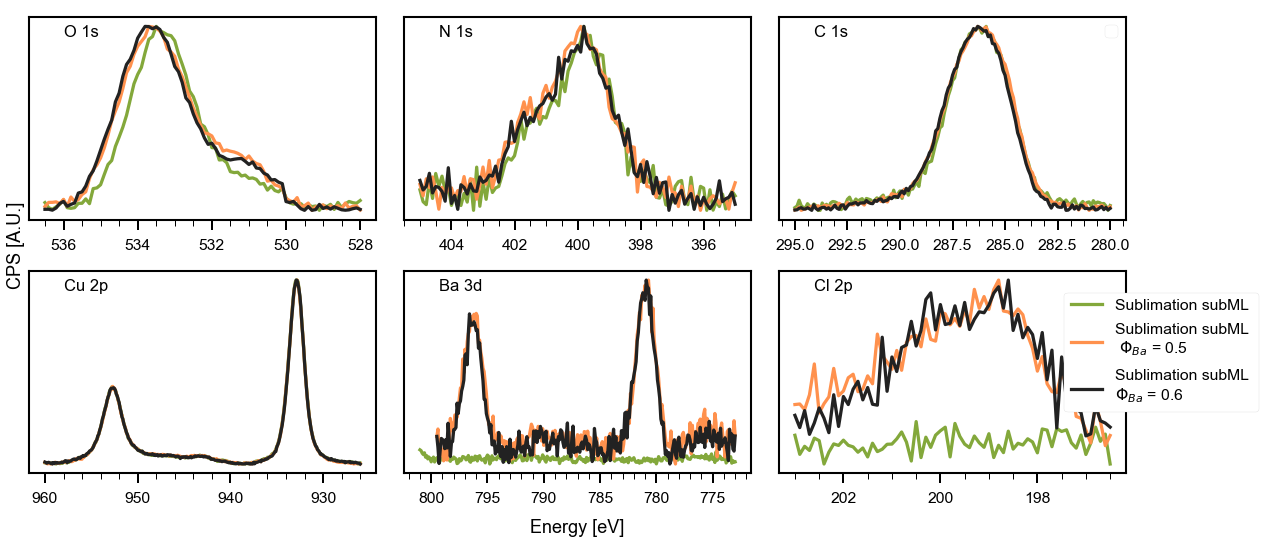

In [349]:
plot_xp_regions(nsel[:1] + nselba[:2] , ['O_1s', 'N_1s', 'C_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p'], ncols=3);

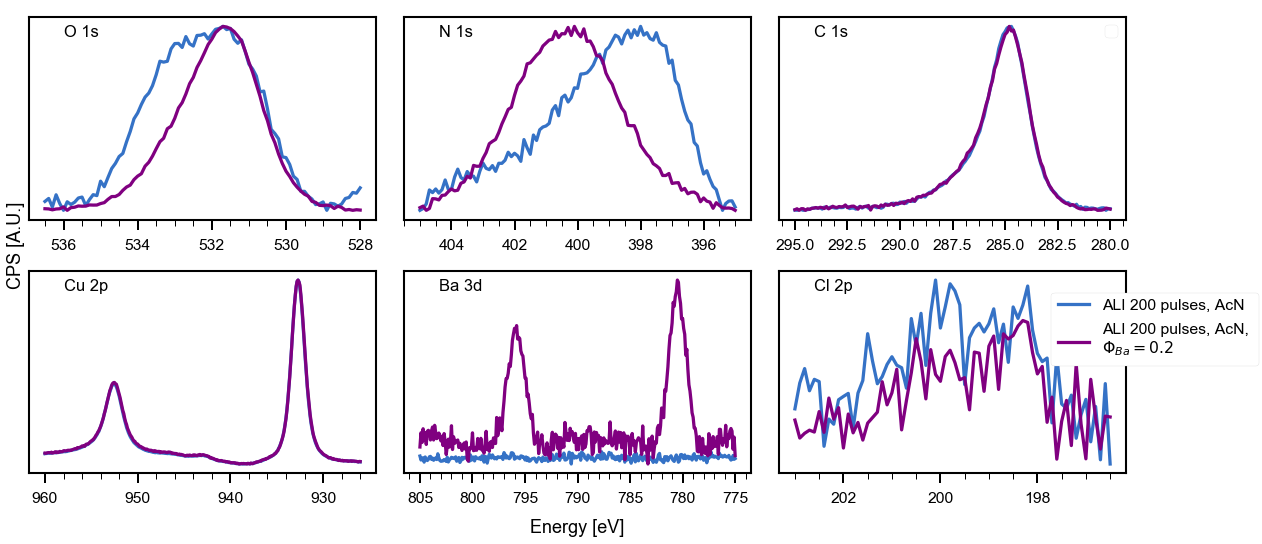

In [350]:
plot_xp_regions([nsel[3], nselba[3]] , ['O_1s', 'N_1s', 'C_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p'], ncols=3);

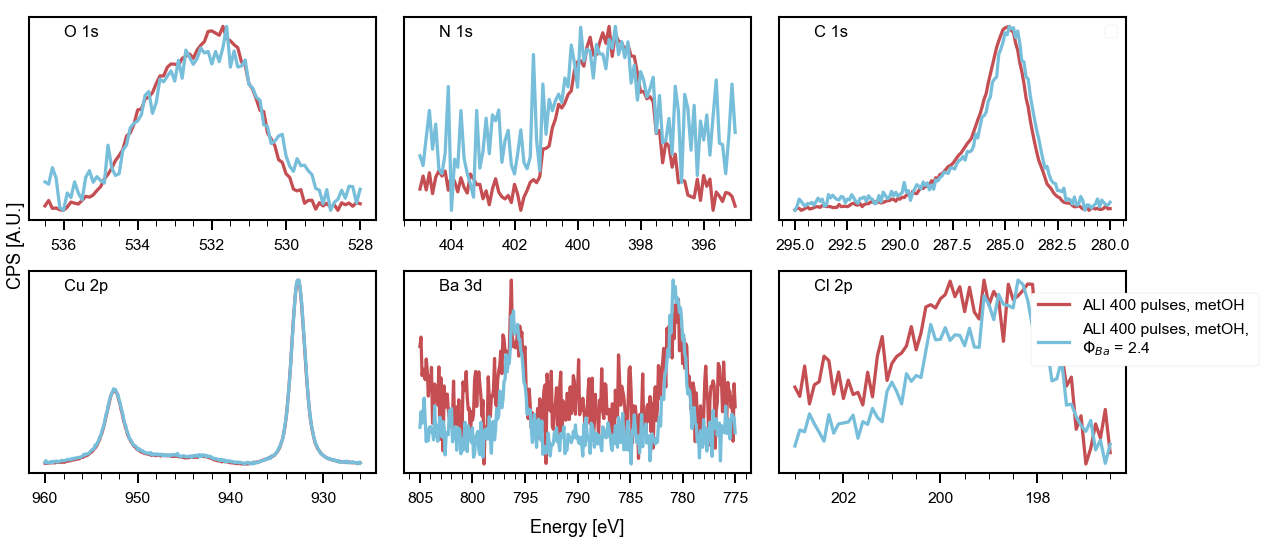

In [351]:
plot_xp_regions([nsel[2], nselba[2]] , ['O_1s', 'N_1s', 'C_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p'], ncols=3);

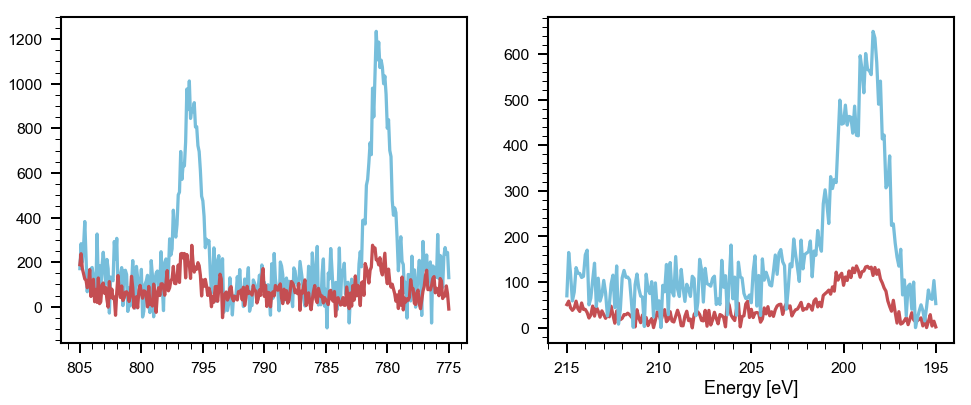

In [354]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
plot_region(fbexps[0], 'Ba_3d', ax=ax[0], col='c')
plot_region(fexps[0], 'Ba_3d', ax=ax[0], col='r')
# ax[0].get_legend().remove()
ax[0].invert_xaxis()

plot_region(fexps[0], 'Cl_2p', ax=ax[1], col='r')
plot_region(fbexps[0], 'Cl_2p', ax=ax[1], col='c')
ax[1].get_legend().remove()
ax[1].set(ylabel=None)
ax[1].invert_xaxis()

## Thickness

In [395]:
[xp.name for xp in acn_exps]

['Cu_clean',
 'FBI_100_pulses',
 'FBI_Ba_100_pulses',
 'FBI_200_pulses',
 'FBI_Ba_200_pulses',
 'FBI_400_pulses',
 'FBI-ester_200_pulses',
 'FBI-ester_200_pulses_Ba_subl']

In [420]:
acn_fbi = [acn_exps[i] for i in [1, 3, 5]]
acn_fbi[0].name = 'AcN_100_pulses'
acn_fbi[1].name = 'AcN_200_pulses'
acn_fbi[2].name = 'AcN_400_pulses'

In [421]:
proc_exps[2].name = 'metOH_400_pulses'

In [422]:
sublf[0].name = 'Subl 10 min'
sublf[1].name = 'Subl 20 min'
sublf[2].name = 'Subl 60 min'

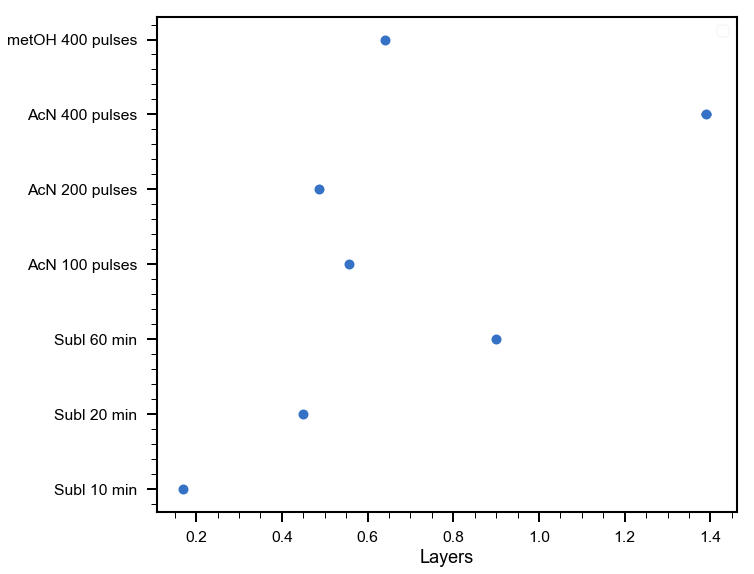

In [423]:
plot_coverages(sublf + acn_fbi + [proc_exps[2]])

In [418]:
for xp in sublf + acn_fbi + [proc_exps[2]]:
    try:
        print(xp.name, xp.area['layers'])
    except KeyError: pass

Subl 10 min 0.16977673887965156
Subl 20 min 0.44898825976914586
Subl 60 min 0.899023390302803
AcN_100_pulses 0.7800022475460651
AcN_200_pulses 0.6833137217917552
AcN_400_pulses 2.144914136175267
metOH_400_pulses 0.6394953519857336
